# SRP Dataset Analysis

Dump of DB dati_ais_with_ts on CSV
`COPY (
SELECT date_time,mmsi,course,speed,heading,a,b,c,d,ST_X (ST_Transform (geom, 4326)) as longitude, ST_Y (ST_Transform (geom, 4326)) as latitude,source FROM ais_data
) TO '/home/angelica/ais_data_small.csv' WITH CSV HEADER DELIMITER ',';`
This notebook analyses the dataset ais_data_clean contained in the postgres database dati_ais2.

In [ ]:
import pandas as pd

df = pd.read_csv('ais_data_small_ts.csv')

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [3]:
print(df['date_time'].min())

Timestamp('2015-12-27 00:00:00')

In [4]:
print(df['date_time'].max())

Timestamp('2017-10-11 22:59:07')

In [5]:
print(df.shape)

(65263705, 11)

In [6]:
df.head(10)

,date_time,mmsi,course,speed,heading,a,b,c,d,longitude,latitude
0,2016-11-06 21:42:31,538080045,249.1,0.0,251.0,32.0,9.0,5.0,5.0,14.51926,35.89016
1,2016-11-06 21:42:31,249649000,242.4,0.0,511.0,18.0,8.0,3.0,3.0,14.51977,35.88864
2,2016-11-06 21:42:31,247314300,289.3,0.2,188.0,211.0,32.0,26.0,16.0,14.88120,35.96471
3,2016-11-06 21:42:32,256574000,347.2,0.0,511.0,13.0,12.0,4.0,3.0,14.51881,35.88835
4,2016-11-06 21:42:32,248000285,350.9,1.1,511.0,6.0,6.0,2.0,2.0,14.55202,35.82655
5,2016-11-06 21:42:33,373753000,360.0,0.0,511.0,20.0,17.0,4.0,4.0,14.50303,35.88059
6,2016-11-06 21:42:34,232883000,323.5,0.0,232.0,40.0,55.0,11.0,4.0,14.51668,35.89147
7,2016-11-06 21:42:34,256051000,56.4,0.1,511.0,16.0,15.0,5.0,6.0,14.54231,35.81631
8,2016-11-06 21:42:35,249000903,173.3,0.0,511.0,0.0,32.0,0.0,6.0,14.50160,35.88061
9,2016-11-06 21:42:35,241315000,73.0,0.2,150.0,189.0,39.0,12.0,20.0,14.91068,36.00818


# Cleaning
* speed less than 0.1
* speed greater than 60 - capire quanti dati sono e se correggere
* data related to bosforo (data 2015-12-27)
* heading > 360 - capire quanti sono e se correggere
* records where a mmsi is present only once

In [16]:
df = df.drop(df[df['speed'] <= 0.1].index)

In [ ]:
df = df.drop(df[df['speed'] >= 60].index)

In [ ]:
df = df.drop(df[df['date_time'] < '2015-12-28'].index)

In [ ]:
df = df.drop(df[df['heading'] > 360].index)

In [ ]:
df = df.groupby(['mmsi']).filter(lambda x : x['date_time'].count() > 1)

In [15]:
df.describe()

,mmsi,course,speed,a,b,c,d,longitude,latitude
count,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07,1.837082e+07
mean,3.625244e+08,1.851212e+02,8.487151e-01,1.171460e+02,4.268572e+01,1.295987e+01,1.263577e+01,1.405974e+01,3.602681e+01
std,1.463821e+08,9.935053e+01,6.394008e-01,7.132031e+01,4.582675e+01,7.446013e+00,7.704603e+00,1.320269e+00,8.701592e-01
min,1.112471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.971340e+00,3.231069e+01
25%,2.472788e+08,1.050000e+02,0.000000e+00,6.500000e+01,1.900000e+01,7.000000e+00,7.000000e+00,1.348407e+01,3.582253e+01
50%,3.048140e+08,1.780000e+02,1.000000e+00,1.220000e+02,3.000000e+01,1.100000e+01,1.100000e+01,1.455755e+01,3.599202e+01
75%,5.186820e+08,2.847000e+02,1.000000e+00,1.620000e+02,4.400000e+01,1.800000e+01,1.700000e+01,1.486062e+01,3.643581e+01
max,7.812418e+08,4.065000e+02,3.000000e+00,5.110000e+02,5.110000e+02,6.300000e+01,6.300000e+01,1.606201e+01,3.774155e+01


In [ ]:
df.to_csv('source/ais_data_clean.csv')

# Normalization 
* Discretize columns
* Standardization columns (this is done to give the same weight to every feature): three techniques available simple feature scaling, min-max, z-score

In [17]:
import pandas as pd
df = pd.read_csv('source/ais_data_clean.csv')
df['date_time'] = pd.to_datetime(df['date_time'])

In [18]:
df.shape

(18370824, 12)

In [8]:
df.drop(columns=['heading', 'Unnamed: 0'], axis=1,inplace=True)

In [9]:
df.head(10)

,date_time,mmsi,course,speed,a,b,c,d,longitude,latitude
0,2016-11-06 21:42:31,247314300,289.3,0.2,211.0,32.0,26.0,16.0,14.88120,35.96471
1,2016-11-06 21:42:35,241315000,73.0,0.2,189.0,39.0,12.0,20.0,14.91068,36.00818
2,2016-11-06 21:42:37,212339000,310.8,0.2,117.0,13.0,7.0,12.0,10.83956,34.67698
3,2016-11-06 21:42:37,255805623,123.0,0.2,120.0,29.0,10.0,13.0,14.86638,35.77951
4,2016-11-06 21:42:39,304634000,80.6,14.0,126.0,14.0,18.0,6.0,15.66044,35.86181
5,2016-11-06 21:42:44,304095000,236.1,2.2,136.0,11.0,18.0,5.0,15.28759,32.36729
6,2016-11-06 21:42:45,371158000,54.0,0.6,200.0,30.0,18.0,18.0,15.36713,35.48793
7,2016-11-06 21:42:50,250002045,175.7,0.4,114.0,23.0,13.0,13.0,14.43508,35.99266
8,2016-11-06 21:42:54,248922000,347.0,1.1,226.0,44.0,22.0,22.0,14.77100,36.04500
9,2016-11-06 21:42:54,205696000,276.7,1.0,19.0,33.0,8.0,7.0,14.83792,35.91907


Discretize speed and course

In [10]:
def get_discretized_speed(speed):
    # speed class
    sc = 0 # slow - speed between 0.5 and 3
    if speed > 3 and speed <= 14:
        sc = 1 # medium
    elif speed > 14 and speed <= 23:
        sc = 2 # high
    elif speed > 23 and speed <= 60:
        sc = 3 # very high
    elif speed > 60:
        sc = 4 # exception
    return sc 

In [11]:
def get_discretized_course(course):
    # course class
    cc = 0 # nord 337.5 - 22.5
    if course > 22.5 and course <= 67.5:
        cc = 1
    elif course > 67.5 and course <= 112.5:
        cc = 2
    elif course > 112.5 and course <= 157.5:
        cc = 3
    elif course > 157.5 and course <= 202.5:
        cc = 4
    elif course > 202.5 and course <= 247.5:
        cc = 5
    elif course > 247.5 and course <= 292.5:
        cc = 6
    elif course > 292.5 and course <= 337.5:
        cc = 7
    return cc

In [12]:
def get_basic_class(length):
    small_ship_length = 50.0 
    small_ship_width = 6.0 # 6-8
    big_ship_length = 51.0
    big_ship_width = 15.0
    if length <= small_ship_length:
        return 0 # small ship class 0
    if length >= big_ship_length:
        return 1 # big ship class 2
    return 2 # medium ship class 1

In [13]:
df['speed'] = df['speed'].apply(get_discretized_speed)

Text(0.5, 1.0, 'Speed Distribution')

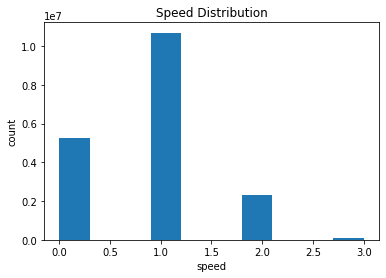

In [14]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["speed"])

# set x/y labels and plot title
plt.pyplot.xlabel("speed")
plt.pyplot.ylabel("count")
plt.pyplot.title("Speed Distribution")

In [51]:
df['course'] = df['course'].apply(get_discretized_course)

Text(0.5, 1.0, 'Course Distribution')

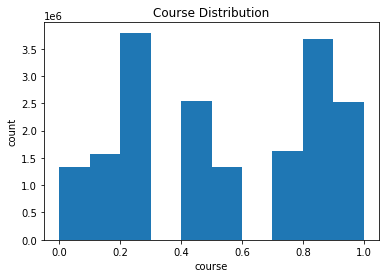

In [100]:
plt.pyplot.hist(df["course"])

# set x/y labels and plot title
plt.pyplot.xlabel("course")
plt.pyplot.ylabel("count")
plt.pyplot.title("Course Distribution")

Get class

In [54]:
df['length'] = abs(df['b'] + df['a'])

In [56]:
df['width'] = abs(df['c'] + df['d'])

In [61]:
df['class'] = df['length'].apply(get_basic_class)

In [63]:
df.drop(columns=['a', 'b','c','d'], axis=1,inplace=True)

In [ ]:
df.drop(columns=['width', 'length'], axis=1,inplace=True)

In [68]:
df.head(10)

,date_time,mmsi,course,speed,longitude,latitude,class
0,2016-11-06 21:42:31,247314300,6,0,14.88120,35.96471,1
1,2016-11-06 21:42:35,241315000,2,0,14.91068,36.00818,1
2,2016-11-06 21:42:37,212339000,7,0,10.83956,34.67698,1
3,2016-11-06 21:42:37,255805623,3,0,14.86638,35.77951,1
4,2016-11-06 21:42:39,304634000,2,1,15.66044,35.86181,1
5,2016-11-06 21:42:44,304095000,5,0,15.28759,32.36729,1
6,2016-11-06 21:42:45,371158000,1,0,15.36713,35.48793,1
7,2016-11-06 21:42:50,250002045,4,0,14.43508,35.99266,1
8,2016-11-06 21:42:54,248922000,0,0,14.77100,36.04500,1
9,2016-11-06 21:42:54,205696000,6,0,14.83792,35.91907,1


Standardize course and speed. Use simple scaling

In [70]:
df['course'] = df['course']/df['course'].max()

In [71]:
df['speed'] = df['speed']/df['speed'].max()

In [72]:
df.head(10)

,date_time,mmsi,course,speed,longitude,latitude,class
0,2016-11-06 21:42:31,247314300,0.857143,0.000000,14.88120,35.96471,1
1,2016-11-06 21:42:35,241315000,0.285714,0.000000,14.91068,36.00818,1
2,2016-11-06 21:42:37,212339000,1.000000,0.000000,10.83956,34.67698,1
3,2016-11-06 21:42:37,255805623,0.428571,0.000000,14.86638,35.77951,1
4,2016-11-06 21:42:39,304634000,0.285714,0.333333,15.66044,35.86181,1
5,2016-11-06 21:42:44,304095000,0.714286,0.000000,15.28759,32.36729,1
6,2016-11-06 21:42:45,371158000,0.142857,0.000000,15.36713,35.48793,1
7,2016-11-06 21:42:50,250002045,0.571429,0.000000,14.43508,35.99266,1
8,2016-11-06 21:42:54,248922000,0.000000,0.000000,14.77100,36.04500,1
9,2016-11-06 21:42:54,205696000,0.857143,0.000000,14.83792,35.91907,1


Extract cell from coordinates (row and column)

In [89]:
from math import floor
from math import copysign

def get_position(x,ctype,cx):
    if cx > 0:
        if ctype == "lng":
            xg = floor(copysign((abs(x)%180),x)/cx)
            if xg == -0:
                xg = 0 
        else:
            xg = floor(x/cx)
    else:
        xg = -1
    return xg

In [94]:
cx = 0.1

In [ ]:
df['row'] = df.apply(lambda x: get_position(x['latitude'],'lat',cx), axis=1)
df['column'] = df.apply(lambda x: get_position(x['longitude'],'lng',cx), axis=1)

In [90]:
df.drop(columns=['longitude', 'latitude'], axis=1,inplace=True)

In [92]:
df.to_csv('source/ais_data_discretized_' + str(cx) + '.csv')

# Next Status

In [95]:
import pandas as pd
df = pd.read_csv('source/ais_data_discretized_' + str(cx) + '.csv')
df['date_time'] = pd.to_datetime(df['date_time'])

In [97]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
df.head(10)

,date_time,mmsi,course,speed,class,row,column
0,2016-11-06 21:42:31,247314300,0.857143,0.000000,1,359,148
1,2016-11-06 21:42:35,241315000,0.285714,0.000000,1,360,149
2,2016-11-06 21:42:37,212339000,1.000000,0.000000,1,346,108
3,2016-11-06 21:42:37,255805623,0.428571,0.000000,1,357,148
4,2016-11-06 21:42:39,304634000,0.285714,0.333333,1,358,156
5,2016-11-06 21:42:44,304095000,0.714286,0.000000,1,323,152
6,2016-11-06 21:42:45,371158000,0.142857,0.000000,1,354,153
7,2016-11-06 21:42:50,250002045,0.571429,0.000000,1,359,144
8,2016-11-06 21:42:54,248922000,0.000000,0.000000,1,360,147
9,2016-11-06 21:42:54,205696000,0.857143,0.000000,1,359,148


In [98]:
routes = df.groupby(['mmsi']).apply(lambda x: x.sort_values('date_time'))
routes.head(10)

date_time       mmsi    course     speed  class  \
mmsi                                                                          
111247103 727132  2016-11-21 15:37:44  111247103  0.714286  0.333333      0   
          727248  2016-11-21 15:40:44  111247103  0.714286  0.333333      0   
          727369  2016-11-21 15:43:45  111247103  0.714286  0.333333      0   
          727484  2016-11-21 15:46:45  111247103  0.714286  0.333333      0   
          727613  2016-11-21 15:49:48  111247103  0.714286  0.333333      0   
          727737  2016-11-21 15:52:47  111247103  0.714286  0.333333      0   
          2131400 2016-12-21 13:49:44  111247103  0.714286  0.333333      0   
          2131514 2016-12-21 13:52:45  111247103  0.714286  0.333333      0   
          2131607 2016-12-21 13:55:45  111247103  0.714286  0.333333      0   
          2131704 2016-12-21 13:58:44  111247103  0.714286  0.333333      0   

                   row  column  
mmsi                            
111247103 727132   363     133  
          727248   363     133  
          727369   360     130  
          727484   360     130  
          727613   360     130  
          727737   360     130  
          2131400  362     133  
          2131514  362     133  
          2131607  362     133  
          2131704  362     133

In [133]:
epsilon = 90
ps = 30 * 60
sstep = ps - epsilon
estep = ps + epsilon
for name in routes.index:
    
    group = routes.loc[name[0]]
    group.reset_index(inplace=True)
    #print(group)
    for i in range(0,len(group)):
        ts = group['date_time'][i]
        print('CURRENT TS: ' + str(ts))
        next_sdate = ts + timedelta(seconds=sstep)
        print('NEXT START DATE: ' + str(next_sdate))
        next_edate = ts + timedelta(seconds=estep)
        print('NEXT END DATE: ' + str(next_edate))
        next_cdate = ts + timedelta(seconds=ps)
        res = group[(group['date_time'] <= next_edate) & (group['date_time'] >= next_sdate)]
        # if first element is empty, exit and drop group
        if len(res) == 0:
            print("EMPTY")
            break
        # order by abs asc and take the first
        #res['diff'] = abs(res['date_time'] - ts)
        #print(res)
    

CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS: 2016-11-21 15:37:44
NEXT START DATE: 2016-11-21 16:06:14
NEXT END DATE: 2016-11-21 16:09:14
EMPTY
CURRENT TS

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:38:37
NEXT END DATE: 2016-11-14 19:41:37
EMPTY
CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-1

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

CURRENT TS: 2016-11-14 18:43:09
NEXT START DATE: 2016-11-14 19:11:39
NEXT END DATE: 2016-11-14 19:14:39
CURRENT TS: 2016-11-14 18:46:14
NEXT START DATE: 2016-11-14 19:14:44
NEXT END DATE: 2016-11-14 19:17:44
CURRENT TS: 2016-11-14 18:49:18
NEXT START DATE: 2016-11-14 19:17:48
NEXT END DATE: 2016-11-14 19:20:48
CURRENT TS: 2016-11-14 18:52:17
NEXT START DATE: 2016-11-14 19:20:47
NEXT END DATE: 2016-11-14 19:23:47
CURRENT TS: 2016-11-14 18:55:15
NEXT START DATE: 2016-11-14 19:23:45
NEXT END DATE: 2016-11-14 19:26:45
CURRENT TS: 2016-11-14 18:58:11
NEXT START DATE: 2016-11-14 19:26:41
NEXT END DATE: 2016-11-14 19:29:41
CURRENT TS: 2016-11-14 19:01:03
NEXT START DATE: 2016-11-14 19:29:33
NEXT END DATE: 2016-11-14 19:32:33
CURRENT TS: 2016-11-14 19:03:58
NEXT START DATE: 2016-11-14 19:32:28
NEXT END DATE: 2016-11-14 19:35:28
CURRENT TS: 2016-11-14 19:07:02
NEXT START DATE: 2016-11-14 19:35:32
NEXT END DATE: 2016-11-14 19:38:32
CURRENT TS: 2016-11-14 19:10:07
NEXT START DATE: 2016-11-14 19:3

KeyboardInterrupt: 

In [109]:
from datetime import timedelta
epsilon = 90
ps = 30 * 60
sstep = ps - epsilon
estep = ps + epsilon

ts = routes['date_time']   
format = '%Y-%m-%d %H:%M:%S'
#current_date = datetime.strptime(ts,format)
next_sdate = ts + timedelta(seconds=sstep)
next_edate = ts + timedelta(seconds=estep)
next_cdate = ts + timedelta(seconds=ps)

print(routes[routes['date_time'] <= next_edate])

                            date_time       mmsi    course     speed  class  \
mmsi                                                                          
111247103 727132  2016-11-21 15:37:44  111247103  0.714286  0.333333      0   
          727248  2016-11-21 15:40:44  111247103  0.714286  0.333333      0   
          727369  2016-11-21 15:43:45  111247103  0.714286  0.333333      0   
          727484  2016-11-21 15:46:45  111247103  0.714286  0.333333      0   
          727613  2016-11-21 15:49:48  111247103  0.714286  0.333333      0   
...                               ...        ...       ...       ...    ...   
776000308 5747552 2017-06-10 01:41:14  776000308  0.000000  0.666667      0   
776006008 5690484 2017-06-09 04:14:05  776006008  0.428571  0.333333      0   
          5824980 2017-06-11 08:26:30  776006008  0.000000  0.333333      0   
781241768 5770996 2017-06-10 10:01:09  781241768  0.142857  1.000000      0   
          5791417 2017-06-10 17:28:33  781241768  0.

In [ ]:
delta = 2 # 2 hours
routes.apply(lambda x: pd.Timedelta(x-x.shift(+1)).seconds/3600.0 <= delta, axis=1)

In [ ]:
def get_next_status(row,ps):
    name = row['mmsi']
    ts = row['date_time']
    ps = int(ps)*60
    #epsilon = ps/3
    epsilon = 90
    sstep = ps - epsilon
    estep = ps + epsilon
        
    format = '%Y-%m-%d %H:%M:%S'
    #current_date = datetime.strptime(ts,format)
    next_sdate = ts + timedelta(seconds=sstep)
    next_edate = ts + timedelta(seconds=estep)
    next_cdate = ts + timedelta(seconds=ps)
    
    # do not choose the first one (ORDER BY date_time ASC) but the nearest to the prediction step 
    condition = "mmsi = '" + row['mmsi'] + "' AND date_time >= '" + next_sdate.strftime(format) + "' AND date_time <= '" + next_edate.strftime(format) + "' ORDER BY  abs(EXTRACT(EPOCH FROM (date_time - (timestamp '" + next_cdate.strftime(format) + "')))) ASC LIMIT 1"
    cursor = self.select(self.table, self.lf, condition)
    next = cursor.fetchone()
    if next is None:
        return None
    return next[0]    


# Routes
Group records by mmsi and order by ascending time.

Route = sequence of messages belonging to the same ship. The distance between two messages must be at maximum equal to delta (delta = 120 minutes)

rotta = sequenza di messaggi della stessa nave distanziati tra loro di al massimo di un tempo delta
eliminare dal dataset tutto ciò che non è rotta
eliminare le navi ormeggiate (rotte che dal punto di vista temporale sono ok, mentre dal punto di vista geografico sono stabili, e la velocitià è inferiore a 0.x)

dimensione cella = 5 km (0.05 gradi)

In [ ]:
groups = df.groupby(['mmsi']).apply(lambda x: x.sort_values('date_time'))

In [ ]:
delta = 2 # 2 hours
#routes = groups.apply(lambda x: pd.Timedelta((x['date_time']-x['date_time'].shift(+1))).seconds/3600.0 <= delta)